In [40]:
import pandas as pd
pd.set_option('display.max_columns', 100)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import iqr
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
%matplotlib inline

In [2]:
X = pd.read_csv('train_values.csv')
y = pd.read_csv('train_labels.csv')
building_id = X['building_id'].values.tolist()
X.head()

building_id  geo_level_1_id  geo_level_2_id  geo_level_3_id  \
0       802906               6             487           12198   
1        28830               8             900            2812   
2        94947              21             363            8973   
3       590882              22             418           10694   
4       201944              11             131            1488   

   count_floors_pre_eq  age  area_percentage  height_percentage  \
0                    2   30                6                  5   
1                    2   10                8                  7   
2                    2   10                5                  5   
3                    2   10                6                  5   
4                    3   30                8                  9   

  land_surface_condition foundation_type roof_type ground_floor_type  \
0                      t               r         n                 f   
1                      o               r         n                 x   
2                      t               r         n                 f   
3                      t               r         n                 f   
4                      t               r         n                 f   

  other_floor_type position plan_configuration  has_superstructure_adobe_mud  \
0                q        t                  d                             1   
1                q        s                  d                             0   
2                x        t                  d                             0   
3                x        s                  d                             0   
4                x        s                  d                             1   

   has_superstructure_mud_mortar_stone  has_superstructure_stone_flag  \
0                                    1                              0   
1                                    1                              0   
2                                    1                              0   
3                                    1                              0   
4                                    0                              0   

   has_superstructure_cement_mortar_stone  \
0                                       0   
1                                       0   
2                                       0   
3                                       0   
4                                       0   

   has_superstructure_mud_mortar_brick  \
0                                    0   
1                                    0   
2                                    0   
3                                    0   
4                                    0   

   has_superstructure_cement_mortar_brick  has_superstructure_timber  \
0                                       0                          0   
1                                       0                          0   
2                                       0                          0   
3                                       0                          1   
4                                       0                          0   

   has_superstructure_bamboo  has_superstructure_rc_non_engineered  \
0                          0                                     0   
1                          0                                     0   
2                          0                                     0   
3                          1                                     0   
4                          0                                     0   

   has_superstructure_rc_engineered  has_superstructure_other  \
0                                 0                         0   
1                                 0                         0   
2                                 0                         0   
3                                 0                         0   
4                                 0                         0   

  legal_ownership_status  count_families  has_secondary_use  \
0                 

In [3]:
X = X.merge(y, on = 'building_id')
category_cols = ['count_floors_pre_eq','roof_type', 'foundation_type', 'land_surface_condition', 'ground_floor_type', 'other_floor_type', 'position', 'plan_configuration', 'legal_ownership_status']

In [4]:
X.shape

(260601, 40)

In [5]:
y.drop(['building_id'], axis = 1, inplace = True)
y = np.asarray(y)
y = y.ravel()

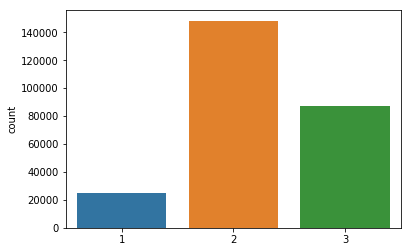

In [6]:
sns.countplot(y)

(array([5.9738e+04, 7.4906e+04, 3.2182e+04, 4.2394e+04, 2.1269e+04,
        4.7110e+03, 9.2900e+03, 4.7350e+03, 1.9750e+03, 3.5670e+03,
        1.9320e+03, 4.1400e+02, 1.4530e+03, 1.2100e+02, 1.8000e+02,
        4.6000e+01, 1.4000e+01, 3.0000e+00, 1.4300e+02, 8.0000e+00,
        6.0000e+00, 1.2000e+01, 4.0000e+00, 2.0000e+00, 1.0600e+02,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.00

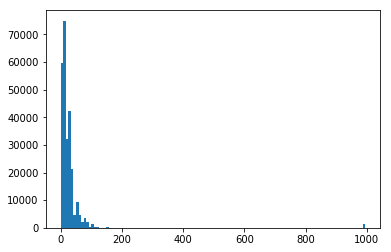

In [7]:
plt.hist(X['age'], bins = 120)

In [8]:
unique = X['age'].unique()
unique[::-1].sort()
unique

array([995, 200, 195, 190, 185, 180, 175, 170, 165, 160, 155, 150, 145,
       140, 135, 130, 125, 120, 115, 110, 105, 100,  95,  90,  85,  80,
        75,  70,  65,  60,  55,  50,  45,  40,  35,  30,  25,  20,  15,
        10,   5,   0])

In [9]:
age = X['age'].values.tolist()
new_age = [200 if x >= 200 else x for x in age]
X.drop(['age'], axis = 1, inplace = True)
new_age = np.array(new_age)
age = (new_age - np.mean(new_age)) / np.std(new_age)
X['age'] = age.T

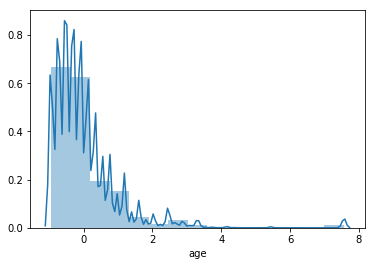

In [10]:
sns.distplot(X['age'], bins = 15, kde = True)

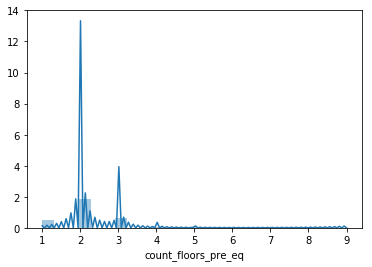

In [11]:
sns.distplot(X['count_floors_pre_eq'], bins = 25, kde = True)

In [12]:
X['count_floors_pre_eq'].value_counts()

2    156623
3     55617
1     40441
4      5424
5      2246
6       209
7        39
9         1
8         1
Name: count_floors_pre_eq, dtype: int64

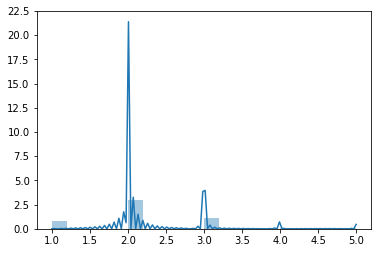

In [13]:
floors = X['count_floors_pre_eq'].values.tolist()
new_floors = [5 if x >= 5 else x for x in floors]
new_floors = np.array(new_floors)
sns.distplot(new_floors, bins = 20, kde = True)

In [14]:
floors = (new_floors - np.mean(new_floors)) / np.std(new_floors)
X.drop(['count_floors_pre_eq'], axis = 1, inplace = True)
X['count_floors_pre_eq'] = floors.T

(array([2.1209e+05, 4.4021e+04, 3.4980e+03, 6.6600e+02, 1.5700e+02,
        7.9000e+01, 4.7000e+01, 2.2000e+01, 1.7000e+01, 4.0000e+00]),
 array([  1. ,  10.9,  20.8,  30.7,  40.6,  50.5,  60.4,  70.3,  80.2,
         90.1, 100. ]),
 <a list of 10 Patch objects>)

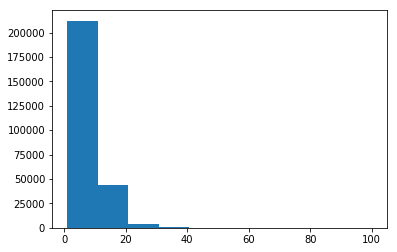

In [15]:
plt.hist(X['area_percentage'], bins = 10)

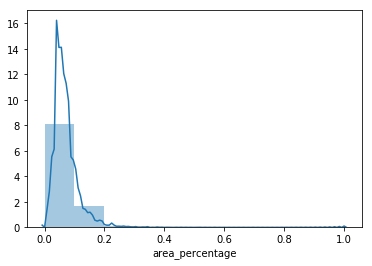

In [16]:
ap = X['area_percentage'].values
ap = (ap - min(ap)) / (max(ap) - min(ap))
X.drop(['area_percentage'], axis = 1, inplace = True)
X['area_percentage'] = ap.T
sns.distplot(X['area_percentage'], bins = 10)

(array([3.5262e+04, 3.7763e+04, 7.8513e+04, 4.6477e+04, 3.5465e+04,
        1.9278e+04, 4.4920e+03, 9.1700e+02, 9.0700e+02, 7.5900e+02,
        3.5800e+02, 1.7900e+02, 9.0000e+00, 7.1000e+01, 7.0000e+00,
        4.6000e+01, 0.0000e+00, 1.1000e+01, 4.0000e+00, 3.0000e+00,
        2.0000e+00, 2.0000e+00, 0.0000e+00, 0.0000e+00, 7.6000e+01]),
 array([ 2. ,  3.2,  4.4,  5.6,  6.8,  8. ,  9.2, 10.4, 11.6, 12.8, 14. ,
        15.2, 16.4, 17.6, 18.8, 20. , 21.2, 22.4, 23.6, 24.8, 26. , 27.2,
        28.4, 29.6, 30.8, 32. ]),
 <a list of 25 Patch objects>)

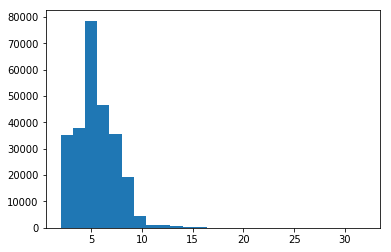

In [17]:
plt.hist(X['height_percentage'], bins = 25)

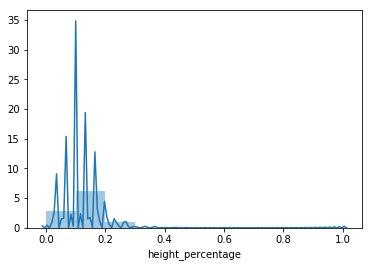

In [18]:
hp = X['height_percentage'].values
hp = (hp - min(hp)) / (max(hp) - min(hp))
X.drop(['height_percentage'], axis = 1, inplace = True)
X['height_percentage'] = hp.T
sns.distplot(X['height_percentage'], bins = 10)

In [19]:
X.head()

building_id  geo_level_1_id  geo_level_2_id  geo_level_3_id  \
0       802906               6             487           12198   
1        28830               8             900            2812   
2        94947              21             363            8973   
3       590882              22             418           10694   
4       201944              11             131            1488   

  land_surface_condition foundation_type roof_type ground_floor_type  \
0                      t               r         n                 f   
1                      o               r         n                 x   
2                      t               r         n                 f   
3                      t               r         n                 f   
4                      t               r         n                 f   

  other_floor_type position plan_configuration  has_superstructure_adobe_mud  \
0                q        t                  d                             1   
1                q        s                  d                             0   
2                x        t                  d                             0   
3                x        s                  d                             0   
4                x        s                  d                             1   

   has_superstructure_mud_mortar_stone  has_superstructure_stone_flag  \
0                                    1                              0   
1                                    1                              0   
2                                    1                              0   
3                                    1                              0   
4                                    0                              0   

   has_superstructure_cement_mortar_stone  \
0                                       0   
1                                       0   
2                                       0   
3                                       0   
4                                       0   

   has_superstructure_mud_mortar_brick  \
0                                    0   
1                                    0   
2                                    0   
3                                    0   
4                                    0   

   has_superstructure_cement_mortar_brick  has_superstructure_timber  \
0                                       0                          0   
1                                       0                          0   
2                                       0                          0   
3                                       0                          1   
4                                       0                          0   

   has_superstructure_bamboo  has_superstructure_rc_non_engineered  \
0                          0                                     0   
1                          0                                     0   
2                          0                                     0   
3                          1                                     0   
4                          0                                     0   

   has_superstructure_rc_engineered  has_superstructure_other  \
0                                 0                         0   
1                                 0                         0   
2                                 0                         0   
3                                 0                         0   
4                                 0                         0   

  legal_ownership_status  count_families  has_secondary_use  \
0                      v               1                  0   
1                      v               1                  0   
2                      v               1                  0   
3                      v               1                  0   
4                      v               1                  0   

   has_secondary_use_agriculture  has_secondary_use_hotel  \
0                              0            

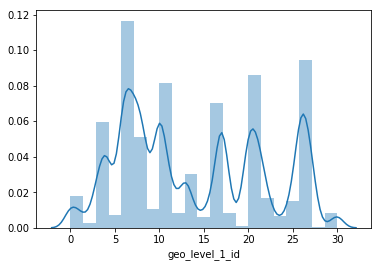

In [20]:
sns.distplot(X['geo_level_1_id'], bins = 21, kde = True)

In [21]:
cuts = pd.cut(X['geo_level_1_id'], 21)
X.drop(['geo_level_1_id'], axis = 1, inplace = True)
le = LabelEncoder()
cuts = le.fit_transform(cuts)
X['geo_level_1_id'] = cuts.T

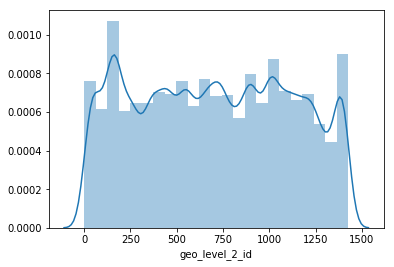

In [22]:
sns.distplot(X['geo_level_2_id'], bins = 23)

In [23]:
cuts = pd.cut(X['geo_level_2_id'], 23)
X.drop(['geo_level_2_id'], axis = 1, inplace = True)
le = LabelEncoder()
cuts = le.fit_transform(cuts)
X['geo_level_2_id'] = cuts.T

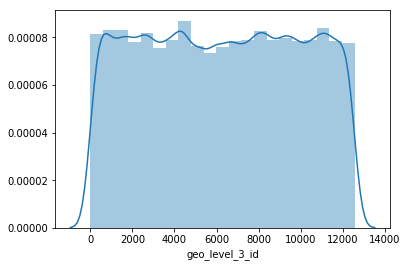

In [24]:
sns.distplot(X['geo_level_3_id'], bins = 21)

In [25]:
temp = X['geo_level_3_id'].values
temp = (temp - min(temp)) / (max(temp) - min(temp))
X.drop(['geo_level_3_id'], axis = 1, inplace = True)
X['geo_level_3_id'] = temp.T

In [26]:
X.head()

building_id land_surface_condition foundation_type roof_type  \
0       802906                      t               r         n   
1        28830                      o               r         n   
2        94947                      t               r         n   
3       590882                      t               r         n   
4       201944                      t               r         n   

  ground_floor_type other_floor_type position plan_configuration  \
0                 f                q        t                  d   
1                 x                q        s                  d   
2                 f                x        t                  d   
3                 f                x        s                  d   
4                 f                x        s                  d   

   has_superstructure_adobe_mud  has_superstructure_mud_mortar_stone  \
0                             1                                    1   
1                             0                                    1   
2                             0                                    1   
3                             0                                    1   
4                             1                                    0   

   has_superstructure_stone_flag  has_superstructure_cement_mortar_stone  \
0                              0                                       0   
1                              0                                       0   
2                              0                                       0   
3                              0                                       0   
4                              0                                       0   

   has_superstructure_mud_mortar_brick  \
0                                    0   
1                                    0   
2                                    0   
3                                    0   
4                                    0   

   has_superstructure_cement_mortar_brick  has_superstructure_timber  \
0                                       0                          0   
1                                       0                          0   
2                                       0                          0   
3                                       0                          1   
4                                       0                          0   

   has_superstructure_bamboo  has_superstructure_rc_non_engineered  \
0                          0                                     0   
1                          0                                     0   
2                          0                                     0   
3                          1                                     0   
4                          0                                     0   

   has_superstructure_rc_engineered  has_superstructure_other  \
0                                 0                         0   
1                                 0                         0   
2                                 0                         0   
3                                 0                         0   
4                                 0                         0   

  legal_ownership_status  count_families  has_secondary_use  \
0                      v               1                  0   
1                      v               1                  0   
2                      v               1                  0   
3                      v               1                  0   
4                      v               1                  0   

   has_secondary_use_agriculture  has_secondary_use_hotel  \
0                              0                        0   
1                              0                        0   
2                              0                        0   
3                              0                        0   
4                              0                        0   

   has_secondary_use_rental  has_secondary_use_institutio

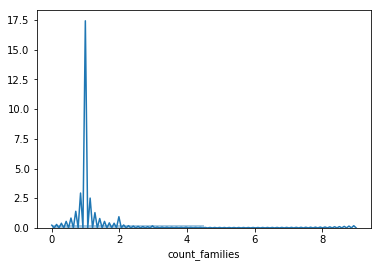

In [27]:
sns.distplot(X['count_families'], bins = 2)

In [28]:
X['count_families'].value_counts()

1    226115
0     20862
2     11294
3      1802
4       389
5       104
6        22
7         7
9         4
8         2
Name: count_families, dtype: int64

In [29]:
cf = X['count_families'].values.tolist()
cf_new = [4 if x >= 4 else x for x in cf]
X.drop(['count_families'], axis = 1, inplace = True)
X['count_families'] = np.array(cf_new).T

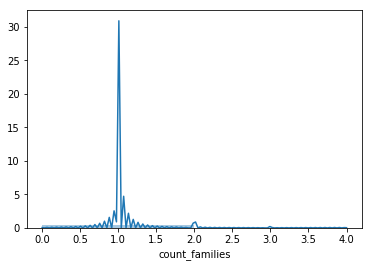

In [30]:
sns.distplot(X['count_families'], bins = 2)

In [31]:
category_cols = ['geo_level_1_id', 'geo_level_2_id', 'roof_type', 'foundation_type', 'land_surface_condition', 'ground_floor_type', 'other_floor_type', 'position', 'plan_configuration', 'legal_ownership_status']
X = pd.get_dummies(X, columns = category_cols)

In [32]:
X.drop(['building_id', 'damage_grade'], axis = 1, inplace = True)
X.head()

has_superstructure_adobe_mud  has_superstructure_mud_mortar_stone  \
0                             1                                    1   
1                             0                                    1   
2                             0                                    1   
3                             0                                    1   
4                             1                                    0   

   has_superstructure_stone_flag  has_superstructure_cement_mortar_stone  \
0                              0                                       0   
1                              0                                       0   
2                              0                                       0   
3                              0                                       0   
4                              0                                       0   

   has_superstructure_mud_mortar_brick  \
0                                    0   
1                                    0   
2                                    0   
3                                    0   
4                                    0   

   has_superstructure_cement_mortar_brick  has_superstructure_timber  \
0                                       0                          0   
1                                       0                          0   
2                                       0                          0   
3                                       0                          1   
4                                       0                          0   

   has_superstructure_bamboo  has_superstructure_rc_non_engineered  \
0                          0                                     0   
1                          0                                     0   
2                          0                                     0   
3                          1                                     0   
4                          0                                     0   

   has_superstructure_rc_engineered  has_superstructure_other  \
0                                 0                         0   
1                                 0                         0   
2                                 0                         0   
3                                 0                         0   
4                                 0                         0   

   has_secondary_use  has_secondary_use_agriculture  has_secondary_use_hotel  \
0                  0                              0                        0   
1                  0                              0                        0   
2                  0                              0                        0   
3                  0                              0                        0   
4                  0                              0                        0   

   has_secondary_use_rental  has_secondary_use_institution  \
0                         0                              0   
1                         0                              0   
2                         0                              0   
3                         0                              0   
4                         0                              0   

   has_secondary_use_school  has_secondary_use_industry  \
0                         0                           0   
1                         0                           0   
2                         0                           0   
3                         0                           0   
4                         0                           0   

   has_secondary_use_health_post  has_secondary_use_gov_office  \
0                              0                             0   
1                              0                             0   
2                              0                             0   
3                              0                             0   
4                              0                             0   

   has_se

In [69]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.20, random_state = 42)
xgb = RandomForestClassifier(n_estimators = 300)

In [70]:
xgb.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=300, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [71]:
y_pred = xgb.predict(X_val)
y_pred

array([3, 2, 2, ..., 3, 3, 2])

In [72]:
f1_score(y_val, y_pred, average = 'micro')

0.7164740372365735

In [85]:
X_test = pd.read_csv('test_values.csv')
building_id = X_test['building_id'].values.tolist()
X_test.head()

building_id  geo_level_1_id  geo_level_2_id  geo_level_3_id  \
0       300051              17             596           11307   
1        99355               6             141           11987   
2       890251              22              19           10044   
3       745817              26              39             633   
4       421793              17             289            7970   

   count_floors_pre_eq  age  area_percentage  height_percentage  \
0                    3   20                7                  6   
1                    2   25               13                  5   
2                    2    5                4                  5   
3                    1    0               19                  3   
4                    3   15                8                  7   

  land_surface_condition foundation_type roof_type ground_floor_type  \
0                      t               r         n                 f   
1                      t               r         n                 f   
2                      t               r         n                 f   
3                      t               r         x                 v   
4                      t               r         q                 f   

  other_floor_type position plan_configuration  has_superstructure_adobe_mud  \
0                q        s                  d                             0   
1                q        s                  d                             0   
2                q        s                  d                             0   
3                j        t                  d                             0   
4                q        t                  d                             0   

   has_superstructure_mud_mortar_stone  has_superstructure_stone_flag  \
0                                    1                              0   
1                                    1                              0   
2                                    1                              0   
3                                    0                              0   
4                                    1                              0   

   has_superstructure_cement_mortar_stone  \
0                                       0   
1                                       0   
2                                       0   
3                                       0   
4                                       0   

   has_superstructure_mud_mortar_brick  \
0                                    0   
1                                    0   
2                                    0   
3                                    0   
4                                    0   

   has_superstructure_cement_mortar_brick  has_superstructure_timber  \
0                                       0                          0   
1                                       0                          0   
2                                       0                          0   
3                                       1                          0   
4                                       0                          0   

   has_superstructure_bamboo  has_superstructure_rc_non_engineered  \
0                          0                                     0   
1                          0                                     0   
2                          0                                     0   
3                          0                                     0   
4                          0                                     0   

   has_superstructure_rc_engineered  has_superstructure_other  \
0                                 0                         0   
1                                 0                         0   
2                                 0                         0   
3                                 0                         0   
4                                 0                         0   

  legal_ownership_status  count_families  has_secondary_use  \
0                 

In [74]:
age = X_test['age'].values.tolist()
new_age = [200 if x >= 200 else x for x in age]
X_test.drop(['age'], axis = 1, inplace = True)
new_age = np.array(new_age)
age = (new_age - np.mean(new_age)) / np.std(new_age)
X_test['age'] = age.T

In [75]:
floors = X_test['count_floors_pre_eq'].values.tolist()
new_floors = [5 if x >= 5 else x for x in floors]
new_floors = np.array(new_floors)
floors = (new_floors - np.mean(new_floors)) / np.std(new_floors)
X_test.drop(['count_floors_pre_eq'], axis = 1, inplace = True)
X_test['count_floors_pre_eq'] = floors.T

In [76]:
ap = X_test['area_percentage'].values
ap = (ap - min(ap)) / (max(ap) - min(ap))
X_test.drop(['area_percentage'], axis = 1, inplace = True)
X_test['area_percentage'] = ap.T

In [77]:
hp = X_test['height_percentage'].values
hp = (hp - min(hp)) / (max(hp) - min(hp))
X_test.drop(['height_percentage'], axis = 1, inplace = True)
X_test['height_percentage'] = hp.T

In [78]:
cuts = pd.cut(X_test['geo_level_1_id'], 21)
X_test.drop(['geo_level_1_id'], axis = 1, inplace = True)
le = LabelEncoder()
cuts = le.fit_transform(cuts)
X_test['geo_level_1_id'] = cuts.T

In [79]:
cuts = pd.cut(X_test['geo_level_2_id'], 23)
X_test.drop(['geo_level_2_id'], axis = 1, inplace = True)
le = LabelEncoder()
cuts = le.fit_transform(cuts)
X_test['geo_level_2_id'] = cuts.T

In [80]:
temp = X_test['geo_level_3_id'].values
temp = (temp - min(temp)) / (max(temp) - min(temp))
X_test.drop(['geo_level_3_id'], axis = 1, inplace = True)
X_test['geo_level_3_id'] = temp.T

In [81]:
cf = X_test['count_families'].values.tolist()
cf_new = [4 if x >= 4 else x for x in cf]
X_test.drop(['count_families'], axis = 1, inplace = True)
X_test['count_families'] = np.array(cf_new).T

In [82]:
category_cols = ['geo_level_1_id', 'geo_level_2_id', 'roof_type', 'foundation_type', 'land_surface_condition', 'ground_floor_type', 'other_floor_type', 'position', 'plan_configuration', 'legal_ownership_status']
X_test = pd.get_dummies(X_test, columns = category_cols)

In [83]:
X_test.drop(['building_id'], axis = 1, inplace = True)
X_test.head()

has_superstructure_adobe_mud  has_superstructure_mud_mortar_stone  \
0                             0                                    1   
1                             0                                    1   
2                             0                                    1   
3                             0                                    0   
4                             0                                    1   

   has_superstructure_stone_flag  has_superstructure_cement_mortar_stone  \
0                              0                                       0   
1                              0                                       0   
2                              0                                       0   
3                              0                                       0   
4                              0                                       0   

   has_superstructure_mud_mortar_brick  \
0                                    0   
1                                    0   
2                                    0   
3                                    0   
4                                    0   

   has_superstructure_cement_mortar_brick  has_superstructure_timber  \
0                                       0                          0   
1                                       0                          0   
2                                       0                          0   
3                                       1                          0   
4                                       0                          0   

   has_superstructure_bamboo  has_superstructure_rc_non_engineered  \
0                          0                                     0   
1                          0                                     0   
2                          0                                     0   
3                          0                                     0   
4                          0                                     0   

   has_superstructure_rc_engineered  has_superstructure_other  \
0                                 0                         0   
1                                 0                         0   
2                                 0                         0   
3                                 0                         0   
4                                 0                         0   

   has_secondary_use  has_secondary_use_agriculture  has_secondary_use_hotel  \
0                  0                              0                        0   
1                  1                              1                        0   
2                  0                              0                        0   
3                  1                              0                        0   
4                  0                              0                        0   

   has_secondary_use_rental  has_secondary_use_institution  \
0                         0                              0   
1                         0                              0   
2                         0                              0   
3                         1                              0   
4                         0                              0   

   has_secondary_use_school  has_secondary_use_industry  \
0                         0                           0   
1                         0                           0   
2                         0                           0   
3                         0                           0   
4                         0                           0   

   has_secondary_use_health_post  has_secondary_use_gov_office  \
0                              0                             0   
1                              0                             0   
2                              0                             0   
3                              0                             0   
4                              0                             0   

   has_se

In [84]:
y_test = xgb.predict(X_test)

In [86]:
df = pd.DataFrame()
df['building_id'] = np.array(building_id).T
df['damage_grade'] = np.array(y_test).T
df

building_id  damage_grade
0           300051             3
1            99355             2
2           890251             2
3           745817             1
4           421793             3
5           871976             2
6           691228             1
7           896100             3
8           343471             2
9           766647             2
10          800548             2
11          652685             2
12          590834             3
13          612530             2
14          535718             2
15          269418             2
16          281421             2
17          797571             2
18          216579             2
19           81554             2
20          132785             2
21          976125             3
22          851237             3
23          322922             3
24          786774             2
25          922680             2
26          134349             1
27          551456             2
28          194812             2
29          520031             3
...            ...           ...
86838       330032             2
86839        53899             3
86840      1005029             2
86841       718016             2
86842       923781             2
86843       955744             2
86844       928435             3
86845       104340             2
86846       300063             3
86847       890454             2
86848        89531             2
86849      1031834             3
86850       512017             2
86851       660885             1
86852       744356             2
86853       390588             3
86854       454519             3
86855      1051332             3
86856       590265             2
86857       235129             3
86858       290842             3
86859       330371             2
86860       698612             2
86861       445192             2
86862       640115             2
86863       310028             2
86864       663567             2
86865      1049160             2
86866       442785             2
86867       501372             2

[86868 rows x 2 columns]

In [87]:
df.to_csv('solution.csv', index = False)